## Link al notebook con las celdas de python para la resolucion de los ejercicios
https://github.com/JesuaVAlc/Deberes-Metodos-Numericos/blob/main/Tarea9_JesuaVillacis.ipynb

**1.** Para cada uno de los siguientes sistemas lineales, obtenga, de ser posible, una solución con métodos gráficos.
Explique los resultados desde un punto de vista geométrico.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [32]:
def eliminacion_gaussiana(A, b):
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    
    m, n = A.shape
    
    if m < n:
        return None

    if m > n:
        At = A.T
        A = At @ A
        b = At @ b
        m, n = A.shape
    
    Ab = np.hstack([A, b.reshape(-1, 1)])
    
    try:
        for i in range(n):
            max_row = np.argmax(np.abs(Ab[i:, i])) + i
            Ab[[i, max_row]] = Ab[[max_row, i]]

            pivot = Ab[i, i]
            if np.isclose(pivot, 0):
                return None
            
            Ab[i, :] /= pivot
            for j in range(i + 1, n):
                factor = Ab[j, i]
                Ab[j, :] -= factor * Ab[i, :]

        x = np.zeros(n)
        for i in range(n - 1, -1, -1):
            x[i] = Ab[i, -1] - np.dot(Ab[i, i+1:n], x[i+1:n])
        
        return x
        
    except IndexError:
        return None



In [22]:
def graficar_sistema_lineal(A, b):
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    n_ec, n_var = A.shape

    if n_var == 2:
        x_vals = np.linspace(-10, 10, 400)
        plt.figure(figsize=(8, 6))
        colores = ['red', 'blue', 'green', 'orange']

        for i in range(n_ec):
            a, b_i = A[i]
            if b_i != 0:
                y_vals = (b[i] - a * x_vals) / b_i
                plt.plot(x_vals, y_vals, label=f'{a:.1f}x + {b_i:.1f}y = {b[i]:.1f}', color=colores[i % len(colores)])
            else:
                x_const = b[i] / a
                plt.axvline(x_const, label=f'{a:.1f}x = {b[i]:.1f}', color=colores[i % len(colores)])

        plt.axhline(0, color='gray', linewidth=0.5)
        plt.axvline(0, color='gray', linewidth=0.5)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Gráfica del sistema en 2D')
        plt.grid(True)
        plt.legend()
        plt.show()

    elif n_var == 3:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        x = np.linspace(-10, 10, 20)
        y = np.linspace(-10, 10, 20)
        X, Y = np.meshgrid(x, y)

        colores = ['red', 'blue', 'green', 'orange']
        for i in range(n_ec):
            a, b_, c = A[i]
            if c != 0:
                Z = (b[i] - a * X - b_ * Y) / c
                ax.plot_surface(X, Y, Z, alpha=0.5, color=colores[i % len(colores)], label=f'Ecuación {i+1}')
            else:
                Z = np.zeros_like(X)
                ax.plot_surface(X, Y, Z, alpha=0.2)

        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        ax.set_title('Gráfica del sistema en 3D')
        plt.show()

    else:
        print("No se puede graficar en más de 3 dimensiones.")

**a)**
\begin{gather*}
x_1+2x_2=0,\\
x_1-x_2=0
\end{gather*}

Solución al sistema de ecuaciones lineales:  [ 0. -0.]


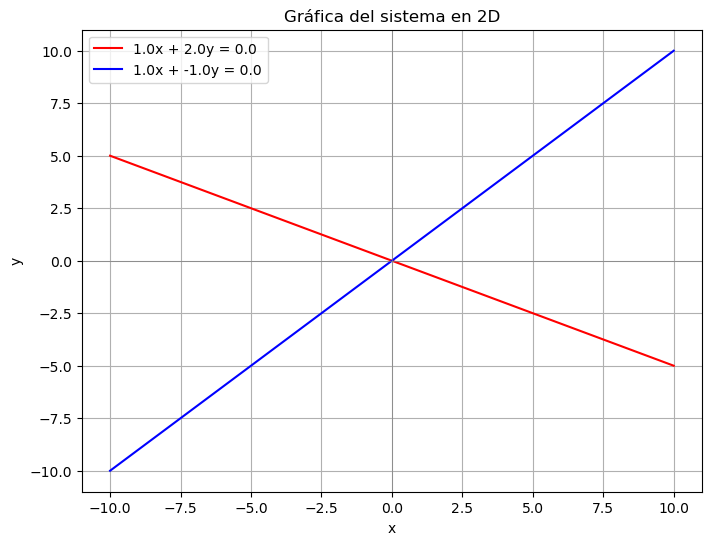

In [30]:
A = np.array([[1, 2],
              [1, -1]])
b = np.array([0, 0])

x = eliminacion_gaussiana(A, b)
print('Solución al sistema de ecuaciones lineales: ', x)

graficar_sistema_lineal(A, b)

*R=* Podemos observar que geometricamente, ambas rectas se intersecan en un solo punto, dandonos como resultado los valores correctos del sistema de ecuaciones lineales propuesto.

**b)**
\begin{gather*}
x_1+2x_2=3,\\
-2x_1-4x2=6
\end{gather*}

Solución al sistema de ecuaciones lineales:  None


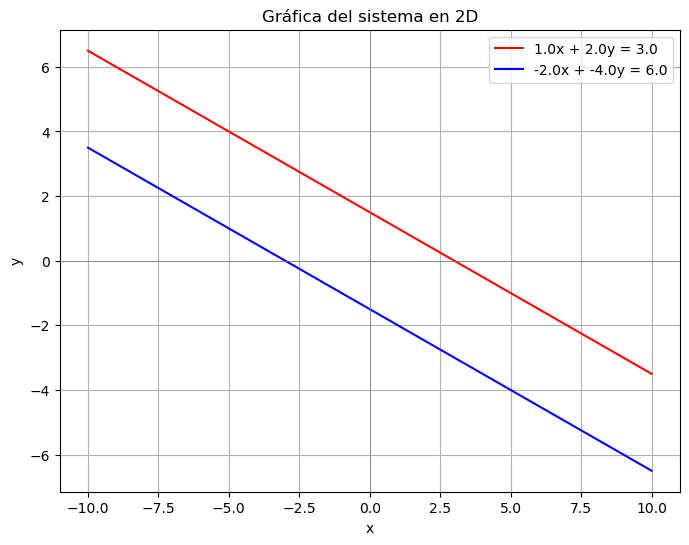

In [33]:
A = np.array([[1, 2],
              [-2, -4]])
b = np.array([3, 6])

x = eliminacion_gaussiana(A, b)
print('Solución al sistema de ecuaciones lineales: ', x)

graficar_sistema_lineal(A, b)

*R=* En la anterior grafica podemos apreciar que ambas rectas no se tocan, es decir, son paralelas, por lo tanto no tienen una solucion.

**c)**
\begin{gather*}
2x_1+x_2=-1,\\
x_1+x_2=2,\\
x_1-3x_2=5
\end{gather*}

Solución al sistema de ecuaciones lineales:  [ 1.64285714 -2.42857143]


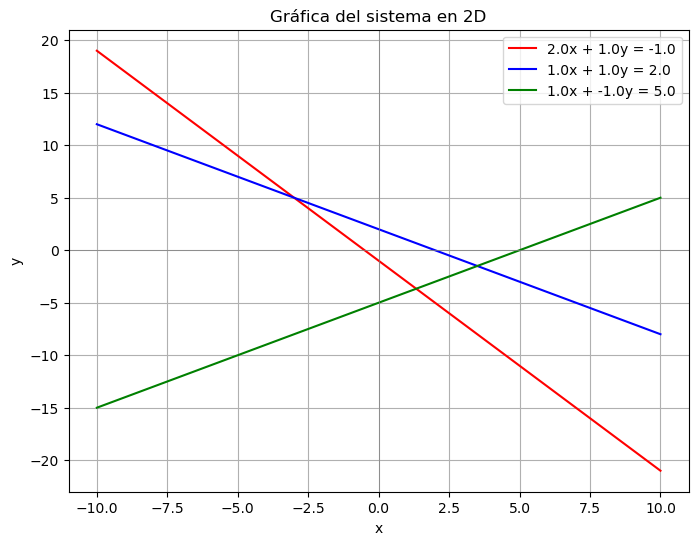

In [34]:
A = np.array([[2, 1],
              [1, 1],
              [1, -1]])
b = np.array([-1, 2, 5])

x = eliminacion_gaussiana(A, b)
print('Solución al sistema de ecuaciones lineales: ', x)

graficar_sistema_lineal(A, b)

*R=* Como podemos ver, las tres rectas si se intersecan entre si, pero no todas al mismo tiempo, por lo tanto podemos decir que no tiene una solución.

**d)**
\begin{gather*}
2x_1+x_2+x_3=1,\\
2x_1+4x_2-x3=-1
\end{gather*}

Solución al sistema de ecuaciones lineales:  None


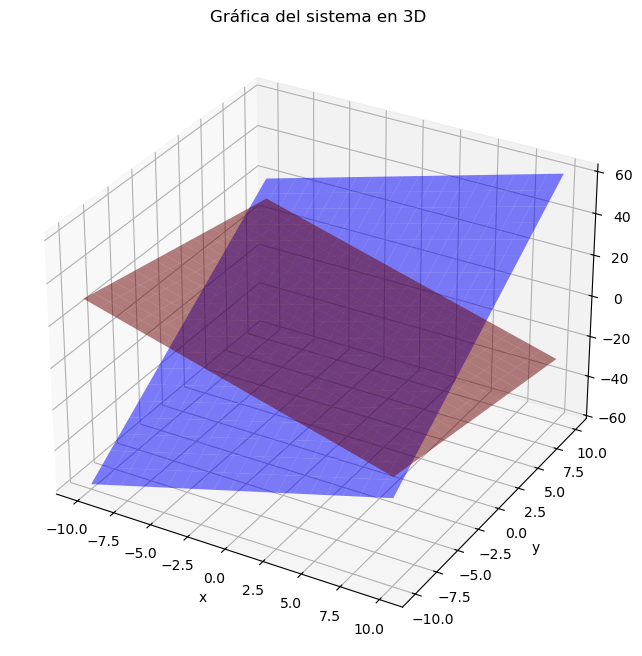

In [36]:

A = np.array([[2, 1,1],
              [2, 4,-1]])

b = np.array([1, -1])

x = eliminacion_gaussiana(A, b)
print('Solución al sistema de ecuaciones lineales: ', x)

graficar_sistema_lineal(A, b)

*R=* Finalmente, en el cuarto sistema de ecuaciones podemos apreciar que hay una región en donde ambas ecuaciones chocan, pero no de forma única por lo que podemos decir que este sistema de ecuaciones tiene infinitas soluciones.

**2.** Utilice la eliminación gaussiana con sustitución hacia atrás y aritmética de redondeo de dos dígitos para resolver los siguientes sistemas lineales. No reordene las ecuaciones. (La solución exacta para cada sistema es 𝑥1 = −1, 𝑥2 = 2, 𝑥3 = 3.)

**a)**
\begin{gather*}
-x_1+4x_2+x_3=8,\\
\frac{5}{3}x_1+\frac{2}{3}x_2+\frac{2}{3}x_3=1,\\
2x_1+x_2+4x_3=11\\
\end{gather*}

**b)**
\begin{gather*}
4x_1+2x_2-x_3=-5,\\
\frac{1}{9}x_1+\frac{1}{9}x_2-\frac{1}{3}x_3=-1,\\
x_1+4x_2+42x_3=9\\
\end{gather*}

**3.** Utilice el algoritmo de eliminación gaussiana para resolver, de ser posible, los siguientes sistemas lineales, y determine si se necesitan intercambios de fila:

**a)**
\begin{gather*}
x_1 - x_2 + 3x_3 = 2 \\
3x_1 - 3x_2 + x_3 = -1 \\
x_1 + x_2 = 3
\end{gather*}

**b)**
\begin{gather*}
2x_1 - 1.5x_2 + 3x_3 = 1 \\
-x_1 + 2x_3 = 3 \\
4x_1 - 4.5x_2 + 5x_3 = 1
\end{gather*}

**c)**
\begin{gather*}
2x_1 = 3 \\
x_1 + 1.5x_2 = 4.5 \\
-3x_2 + 0.5x_3 = -6.6 \\
2x_1 - 2x_2 + x_3 + x_4 = 0.8
\end{gather*}

**d)**
\begin{gather*}
x_1 + x_2 + x_4 = 2 \\
2x_1 + x_2 - x_3 + x_4 = 1 \\
4x_1 - x_2 - 2x_3 + 2x_4 = 0 \\
3x_1 - x_2 - x_3 + 2x_4 = -3
\end{gather*}

**4.** Use el algoritmo de eliminación gaussiana y la aritmética computacional de precisión de 32 bits para resolver los siguientes sistemas lineales.

In [46]:
def eliminacion_gaussiana_32b(A,b):
    A = A.astype(np.float32)
    b = b.astype(np.float32)
    n = len(b)
    Ab = np.hstack([A, b.reshape(-1, 1)])

    for i in range(n):
        max_row = np.argmax(np.abs(Ab[i:, i])) + i
        Ab[[i, max_row]] = Ab[[max_row, i]]
        if np.abs(Ab[i, i]) < 1e-10:
            continue
        for j in range(i+1, n):
            factor = Ab[j, i] / Ab[i, i]
            Ab[j, i:] -= factor * Ab[i, i:]

    x = np.zeros(n, dtype=np.float32)
    for i in range(n-1, -1, -1):
        suma = np.dot(Ab[i, i+1:n], x[i+1:n])
        x[i] = (Ab[i, -1] - suma) / Ab[i, i]
    return x

**a)**
\begin{gather*}
-x_1 + \frac{1}{5}x_2 + \frac{1}{6}x_3 = 9 \\
\frac{1}{3}x_1 + \frac{1}{4}x_2 + \frac{1}{5}x_3 = 8 \\
\frac{1}{2}x_1 + x_2 + 2x_3 = 8
\end{gather*}

In [47]:
A1 = np.array([
    [-1, 1/5, 1/6],
    [1/3, 1/4, 1/5],
    [1/2, 1, 2]
], dtype=np.float32)
b1 = np.array([9, 8, 8], dtype=np.float32)

x1 = eliminacion_gaussiana_32b(A1, b1)
print("Sistema 1:", x1)


Sistema 1: [ -2.16581  52.09098 -21.50404]


**b)**
\begin{gather*}
3.333x_1 + 15920x_2 - 10.333x_3 = 15913 \\
2.222x_1 + 16.71x_2 + 9.612x_3 = 28.544 \\
1.5611x_1 + 5.1791x_2 + 1.6852x_3 = 8.4254
\end{gather*}

In [48]:
A2 = np.array([
    [3.333, 15920, -10.333],
    [2.222, 16.71, 9.612],
    [1.5611, 5.1791, 1.6852]
], dtype=np.float32)
b2 = np.array([15913, 28.544, 8.4254], dtype=np.float32)

x2 = eliminacion_gaussiana_32b(A2, b2)
print("Sistema 2:", x2)

Sistema 2: [0.99970937 1.0000001  1.0001061 ]


**c)**
\begin{gather*}
x_1 + \frac{1}{2}x_2 + \frac{1}{3}x_3 + \frac{1}{4}x_4 = \frac{1}{6} \\
\frac{1}{2}x_1 + \frac{1}{3}x_2 + \frac{1}{4}x_3 + \frac{1}{5}x_4 = \frac{1}{7} \\
\frac{1}{3}x_1 + \frac{1}{4}x_2 + \frac{1}{5}x_3 + \frac{1}{6}x_4 = \frac{1}{8} \\
\frac{1}{4}x_1 + \frac{1}{5}x_2 + \frac{1}{6}x_3 + \frac{1}{7}x_4 = \frac{1}{9}
\end{gather*}

In [49]:
A3 = np.array([
    [1, 1/2, 1/3, 1/4],
    [1/2, 1/3, 1/4, 1/5],
    [1/3, 1/4, 1/5, 1/6],
    [1/4, 1/5, 1/6, 1/7]
], dtype=np.float32)
b3 = np.array([1/6, 1/7, 1/8, 1/9], dtype=np.float32)

x3 = eliminacion_gaussiana_32b(A3, b3)
print("Sistema 3:", x3)

Sistema 3: [-0.03174745  0.59525675 -2.3809996   2.7778091 ]


**d)**
\begin{gather*}
2x_1 + x_2 - x_3 + x_4 - 3x_5 = 7 \\
x_1 + 2x_3 - x_4 + x_5 = 2 \\
-2x_2 + x_3 + x_4 - x_5 = -5 \\
3x_1 + x_2 - 4x_3 + 5x_5 = 6 \\
x_1 - x_2 - x_3 - x_4 + x_5 = -3
\end{gather*}

In [51]:
A4 = np.array([
    [2, 1, -1, 1, -3],
    [1, 0,  2, -1, 1],
    [0, -2, -1, 1, -1],
    [3, 1, -4, 0, 5],
    [1, -1, -1, -1, 1]
], dtype=np.float32)
b4 = np.array([7, 2, -5, 6, -3], dtype=np.float32)

x4 = eliminacion_gaussiana_32b(A4, b4)
print("Sistema 4: ", x4)

Sistema 4:  [1.8830409  2.8070176  0.730994   1.4385961  0.09356716]


**5.** Dado el sistema lineal:
\begin{gather*}
x_1-x_2+\alpha x_3=-2,\\
-x_1+2x_2-\alpha x_3=2,\\
\alpha x_1+x_2+x_3=2
\end{gather*}

a. Encuentre el valor(es) de 𝛼 para los que el sistema no tiene soluciones.

b. Encuentre el valor(es) de 𝛼 para los que el sistema tiene un número infinito de soluciones.

c. Suponga que existe una única solución para una a determinada, encuentre la solución.

### Ejercicios Aplicados
**6.** Suponga que en un sistema biológico existen n especies de animales y m fuentes de alimento. Si 𝑥𝑗 representa la población de las j-ésimas especies, para cada 𝑗 = 1, ⋯ , 𝑛; 𝑏𝑖 ; representa el suministro diario disponible del i-ésimo alimento y 𝑎𝑖𝑗 representa la cantidad del i-ésimo alimento, representa un equilibrio donde existe un suministro diario de alimento para cumplir con precisión con el promedio diario de consumo de cada especie.

**a.** Si
\begin{gather*}
A = [a_{ij}] = 
\begin{bmatrix}
1 & 2 & 0 & 3 \\
1 & 0 & 2 & 2 \\
0 & 0 & 1 & 1
\end{bmatrix}\\
\mathbf{x} = (x_j) = \begin{bmatrix} 1000 ,500  ,350 , 400 \end{bmatrix}, \quad \mathbf{b} = (b_i) = \begin{bmatrix} 3500 , 2700, 900 \end{bmatrix}
\end{gather*}
¿Existe suficiente alimento para satisfacer el consumo promedio diario?

 
*R=* Si, porque los requerimientos reales resultados que son $B=[3200, 2500, 750]$ son mucho menores al requerimiento de alimentos promedio.


**b.** ¿Cuál es el número máximo de animales de cada especie que se podría agregar de forma individual al sistema
con el suministro de alimento que cumpla con el consumo?

*R=* Para la primera especie solo se deberia agregar hasta 200 animales mas, para la segunda 150, a la tercera especie solo se podria agregar hasta 300 ejemplares y a la cuarta solo 100.

**c.** Si la especie 1 se extingue, ¿qué cantidad de incremento individual de las especies restantes se podría soportar?

*R=* La segunda especie podria incrementar en 650, la tercera y la cuarta podrian incrementarse en 150 cada uno.

**d.** Si la especie 2 se extingue, ¿qué cantidad de incremento individual de las especies restantes se podría soportar?

*R=* No se podria incrementar la poblacion de las especies restantes si es que la especie 2 se extingue debido a que no consumian muchos alimentos desde un principio.


### Ejercicios teóricos

**7.** Repita el ejercicio 4 con el método Gauss-Jordan.

In [53]:
def gauss_jordan(A, b):
    A = np.array(A, dtype=np.float32)
    b = np.array(b, dtype=np.float32).reshape(-1, 1)
    n = len(A)
    
    Ab = np.hstack([A, b])  # Matriz aumentada

    for i in range(n):
        # Pivoteo parcial
        max_row = np.argmax(abs(Ab[i:, i])) + i
        if Ab[max_row, i] == 0:
            raise ValueError("El sistema no tiene solución única.")
        Ab[[i, max_row]] = Ab[[max_row, i]]

        # Hacer que el pivote sea 1
        Ab[i] = Ab[i] / Ab[i, i]

        # Hacer ceros en todas las demás filas
        for j in range(n):
            if j != i:
                Ab[j] -= Ab[j, i] * Ab[i]

    return Ab[:, -1]

**a)**

In [55]:
A1 = np.array([
    [-1, 1/5, 1/6],
    [1/3, 1/4, 1/5],
    [1/2, 1, 2]
], dtype=np.float32)
b1 = np.array([9, 8, 8], dtype=np.float32)

x1 = gauss_jordan(A1, b1)
print("Sistema 1:", x1)


Sistema 1: [ -2.165811  52.09098  -21.50404 ]


**b)**

In [56]:
A2 = np.array([
    [3.333, 15920, -10.333],
    [2.222, 16.71, 9.612],
    [1.5611, 5.1791, 1.6852]
], dtype=np.float32)
b2 = np.array([15913, 28.544, 8.4254], dtype=np.float32)

x2 = gauss_jordan(A2, b2)
print("Sistema 2:", x2)

Sistema 2: [0.9998865 1.0000001 1.0001063]


**c)**

In [57]:
A3 = np.array([
    [1, 1/2, 1/3, 1/4],
    [1/2, 1/3, 1/4, 1/5],
    [1/3, 1/4, 1/5, 1/6],
    [1/4, 1/5, 1/6, 1/7]
], dtype=np.float32)
b3 = np.array([1/6, 1/7, 1/8, 1/9], dtype=np.float32)

x3 = gauss_jordan(A3, b3)
print("Sistema 3:", x3)

Sistema 3: [-0.03174686  0.5952499  -2.380982    2.7777972 ]


**d)**

In [58]:
A4 = np.array([
    [2, 1, -1, 1, -3],
    [1, 0,  2, -1, 1],
    [0, -2, -1, 1, -1],
    [3, 1, -4, 0, 5],
    [1, -1, -1, -1, 1]
], dtype=np.float32)
b4 = np.array([7, 2, -5, 6, -3], dtype=np.float32)

x4 = gauss_jordan(A4, b4)
print("Sistema 4: ", x4)

Sistema 4:  [1.8830408  2.8070176  0.73099405 1.4385962  0.09356717]
